In [1]:
#import libraries pandas, matplotlib, and numpy
import pandas as pd 
import matplotlib as plt
import numpy as np

#Import data by reading Excel file
df = pd.read_excel("IPEDS.xlsx")

#Prints column names
print(df.columns)

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)


In [2]:
#Checks for duplicate values in order to clean data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1529    False
1530    False
1531    False
1532    False
1533    False
Length: 1534, dtype: bool

In [3]:
#Sets dataframe index on "Geographic Region" column for easy grouping and querying
df.set_index("Geographic region")

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
Geographic region,,,,,,,,,,,,,,,,,,,,,
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
Mid East DE DC MD NJ NY PA,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
Plains IA KS MN MO NE ND SD,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0


In [4]:
#Creates a column that stores the religious status of each column
df['RYN'] = df['Religious affiliation'].apply(lambda x: 'Secular' if x == 'Not applicable' else 'Religious')

<AxesSubplot:xlabel='Geographic region'>

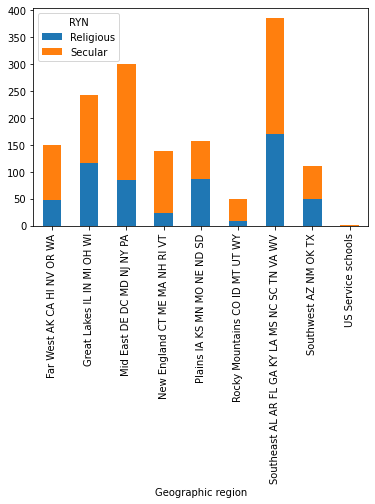

In [10]:
#Groups all colleges by geographic region, gets number of each type, and plots the data in a bar graph
df.groupby('Geographic region')['RYN'].value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:>

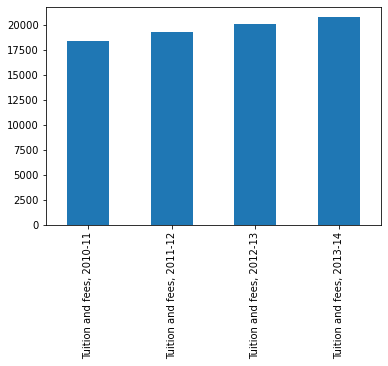

In [6]:
#Combines all data in the columns for each year, gets the mean, and stores it in a list
Cost_Per_Year = df.agg({'Tuition and fees, 2010-11':'mean','Tuition and fees, 2011-12':'mean','Tuition and fees, 2012-13':'mean','Tuition and fees, 2013-14':'mean'})

#Plots the Cost_Per_Year data in a bar to show increase
Cost_Per_Year.plot.bar()

In [24]:
#Creates a column that store the acceptance rate value for each college. 
df["Acceptance Rate"] = df["Admissions total"]/df["Applicants total"]

<AxesSubplot:title={'center':'Lowest Acceptance Rates'}, xlabel='Name'>

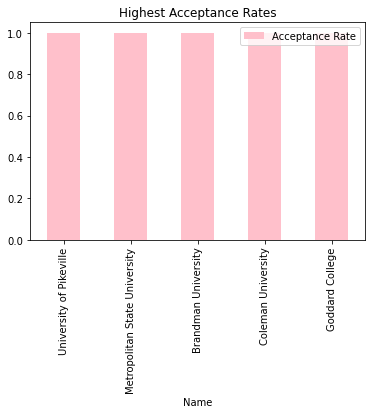

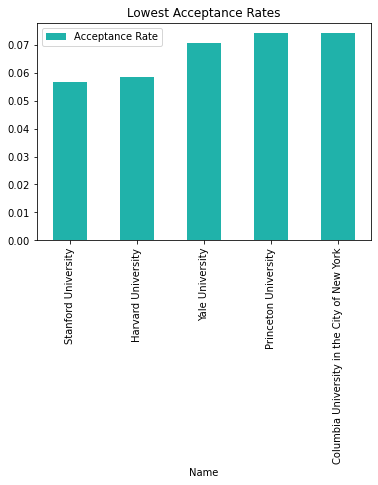

In [30]:
#Gets the first 5 colleges with the highest acceptance rate and puts in a bar plot
df.sort_values(by='Acceptance Rate', ascending=False).head(5).plot.bar(x="Name", y="Acceptance Rate", title="Highest Acceptance Rates", color="Pink")

#Gets the first 5 colleges with the lowest acceptance rate and puts in a bar plot for comparison
df.sort_values(by='Acceptance Rate', ascending=True).head(5).plot.bar(x="Name", y="Acceptance Rate", title="Lowest Acceptance Rates", color="lightseagreen")